# Movement of a charged particle in a magnetic field
### By Mohammad Jafari
#### Fall 2021 - UMA

In this simulation i will try to simulate motion of a charged particle in a magnetic field and see how different parameters can effect motion of this particle .

For math of this simulation as Prof.Saber teached us :

$ x - x_0 = \frac{x_0'}{\omega}  sin(\omega  t)$ , 
$ y - y_0 = \frac{x_0'}{\omega}  cos(\omega  t)$ ,
$ z - z_0 = z_0' t$

And also for velocity we have : 

$ x'  = x_0' cos(\omega  t)$ , 
$ y' = - x_0'  sin(\omega  t)$ ,
$ z'  = z_0' $

Now I am defining required libraries for simulation 

In [290]:
import numpy as np
from matplotlib import pyplot as plt
import math
from random import *
from matplotlib.animation import FuncAnimation

import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

I define 10 random particle with random x,y,z,vx,vy,vz,m,q

In [291]:
particles =np . zeros((10,), dtype=[('x', 'float'), ('y', 'float') , ('z' , 'float'),('vx', 'float'), ('vy', 'float') , ('vz' , 'float') , ('m' , 'float'),('q','float')])
for i in range(10):
    particles[i]['x'] = float(randint(1,10))
    particles[i]['y'] = float(randint(1,10))
    particles[i]['z'] = float(randint(1,10))
    particles[i]['vx'] = float(randint(1,10))
    particles[i]['vy'] = float(randint(1,4))
    particles[i]['vz'] = float(randint(1,4))
    particles[i]['q'] = float(randint(1,100)) *1.6 * 10e-2
    particles[i]['m'] = float(randint(1,500)) * 10e-4

Then i define a constant magnetic field (0.5 Tesla) and time of simulation (10s) and dt duration of each step

In [297]:
b0 = 5 * 10e-3 #Tesla
T = 10.0 #s
dt = 0.01 #s


Now I will simulate the motion of two particle

In [293]:
i = 0 
st = 0
x1 = [particles[i]['x']]
y1 = [particles[i]['y']]
z1 = [particles[i]['z']]

omega = (particles[i]['q'] * b0)/particles[i]['m']
omega1 = (particles[i]['q'] * b0)/particles[i]['m']
while st < T :
    st += dt
    newx = (particles[i]['vx']/omega) * math.sin(omega * st)
    
    particles[i]['x'] += newx
    particles[i]['y'] += (particles[i]['vx']/omega) * math.cos(omega * st)   
    particles[i]['z'] += ((particles[i]['vz'] * st))
    x1.append(particles[i]['x'])
    y1.append(particles[i]['y'])
    z1.append(particles[i]['z'])


In [294]:
i = 1 
st = 0
x = [particles[i]['x']]
y = [particles[i]['y']]
z = [particles[i]['z']]

omega = (particles[i]['q'] * b0)/particles[i]['m']
omega1 = (particles[i]['q'] * b0)/particles[i]['m']
while st < T :
    st += dt
    newx = (particles[i]['vx']/omega) * math.sin(omega * st)
    
    particles[i]['x'] += newx
    particles[i]['y'] += (particles[i]['vx']/omega) * math.cos(omega * st)   
    particles[i]['z'] += ((particles[i]['vz'] * st))
    x.append(particles[i]['x'])
    y.append(particles[i]['y'])
    z.append(particles[i]['z'])

Now i define an 3d space to plot motion of particle

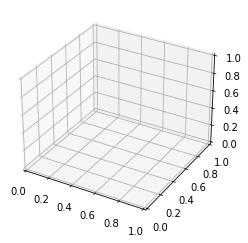

In [295]:
fig = plt.figure()
ax = plt.axes(projection='3d')

C:\Users\ADS.CO\AppData\Local\Temp/ipykernel_3412/3781910997.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


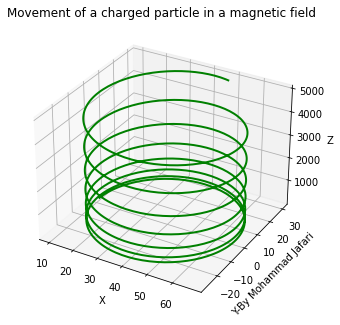

<Figure size 432x288 with 0 Axes>

In [296]:
def func(num, dataSet, line, redDots):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    

    return line
 
 


dataSet = np.array([x, y, z])
numDataPoints = len(z)
 

fig = plt.figure()
ax = Axes3D(fig)

line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 

ax.set_xlabel('X')
ax.set_ylabel('Y-By Mohammad Jafari')
ax.set_zlabel('Z')
ax.set_title('Movement of a charged particle in a magnetic field')
 

line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line,redDots), interval=20, blit=False)
line_ani.save('magnetic/particle1.mp4', writer='ffmpeg')
 
 
plt.show()
plt.savefig('magnetic/particle1.png')

Now I will increase with rate of 0.01 per timestep .

In [301]:
b0 = 0.5
i = 1 
st = 0
x1 = [particles[i]['x']]
y1 = [particles[i]['y']]
z1 = [particles[i]['z']]

omega = (particles[i]['q'] * b0)/particles[i]['m']
omega1 = (particles[i]['q'] * b0)/particles[i]['m']
while st < T :
    st += dt
    b0 += 0.0001
    omega = (particles[i]['q'] * b0)/particles[i]['m']
    
    newx = (particles[i]['vx']/omega) * math.sin(omega * st)
    
    particles[i]['x'] += newx
    particles[i]['y'] += (particles[i]['vx']/omega) * math.cos(omega * st)   
    particles[i]['z'] += ((particles[i]['vz'] * st))
    x1.append(particles[i]['x'])
    y1.append(particles[i]['y'])
    z1.append(particles[i]['z'])

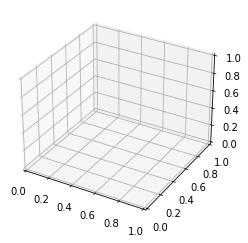

In [302]:
fig = plt.figure()
ax = plt.axes(projection='3d')

C:\Users\ADS.CO\AppData\Local\Temp/ipykernel_3412/2077338157.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


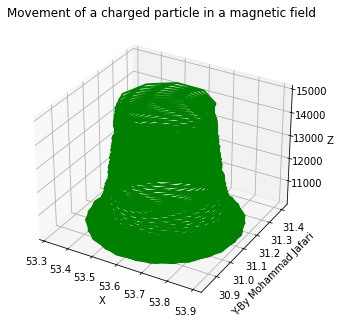

In [303]:
def func(num, dataSet, line, redDots):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    

    return line
 
 


dataSet = np.array([x1, y1, z1])
numDataPoints = len(z)
 

fig = plt.figure()
ax = Axes3D(fig)

line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 

ax.set_xlabel('X')
ax.set_ylabel('Y-By Mohammad Jafari')
ax.set_zlabel('Z')
ax.set_title('Movement of a charged particle in a magnetic field')
 

line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line,redDots), interval=20, blit=False)
line_ani.save('magnetic/particle2.mp4', writer='ffmpeg')
 
 
plt.show()
fig.savefig('magnetic/particle2.png')

As we can see with increasing magnitude of the field what happens also for increasing charge of particle the same effect would happen .

Next i wanna see how velocity of a charged particle changes in a magnetic field to do that :

In [307]:
b0 = 0.5
i = 3 
st = 0
tt = [0]
v0x = particles[i]['vx']
v0y = particles[i]['vy']
v0z = particles[i]['vz']
omega = (particles[i]['q'] * b0)/particles[i]['m']

x1 = [particles[i]['x']]
y1 = [particles[i]['y']]
z1 = [particles[i]['z']]
v1 = []
while st < T :
    st += dt
    tt.append(st)
    newx = (v0x/omega) * math.sin(omega * st)
    
    particles[i]['x'] += newx
    particles[i]['y'] += (v0x/omega) * math.cos(omega * st)   
    particles[i]['z'] += ((v0z * st))
    particles[i]['vx'] = v0x * math.cos(omega * st) 
    particles[i]['vy'] = -1 * v0y * math.sin(omega * st) 
    rv = math.sqrt((particles[i]['vy'] * particles[i]['vy']) + (particles[i]['vx'] * particles[i]['vx']) + (particles[i]['vz']) * particles[i]['vz'])
    v1.append(rv)
    x1.append(particles[i]['x'])
    y1.append(particles[i]['y'])
    z1.append(particles[i]['z'])

C:\Users\ADS.CO\AppData\Local\Temp/ipykernel_3412/4120832826.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


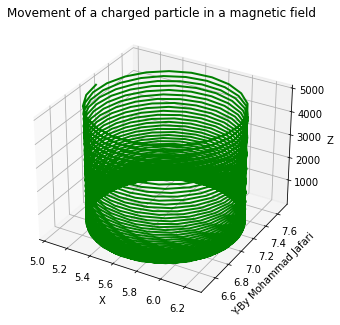

In [308]:
def func(num, dataSet, line, redDots):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    

    return line
 
 


dataSet = np.array([x1, y1, z1])
numDataPoints = len(z)
 

fig = plt.figure()
ax = Axes3D(fig)

line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 

ax.set_xlabel('X')
ax.set_ylabel('Y-By Mohammad Jafari')
ax.set_zlabel('Z')
ax.set_title('Movement of a charged particle in a magnetic field')
 

line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line,redDots), interval=20, blit=False)
line_ani.save('magnetic/particle3.mp4', writer='ffmpeg')
 
 
plt.show()
fig.savefig('magnetic/particle3.png')

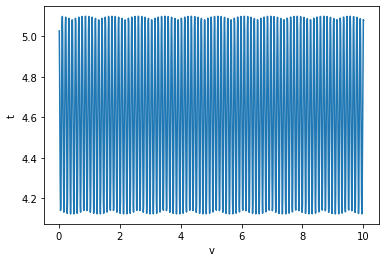

In [323]:
plt.xlabel('v')
plt.ylabel('t')
plt.plot(tt,v1)
plt.savefig('magnetic/velocity.png')

As we can see magnitude of velocity changes in a specific pattern .